<p align="center">
<img src='https://github.com/manuelmorgado/AQiPT/blob/main/resources/aqipt_logo.png?raw=true' width="400" />
</p>


\textbf{Author}: Manuel A. Morgado V. (morgadovargas@unistra.fr)

\textbf{Affiliation}: 

- \textit{Institut de Science et d’Ingénierie Supramoléculaires (ISIS, UMR7006), University of Strasbourg and CNRS}

- \textit{Centre Européen de Sciences Quantiques (CESQ-ISIS, UMR7006), University of Strasbourg and CNRS}

\textbf{Created}: May.01, 2021

\textbf{Last Modification}: Aug.09, 2021

\textbf{License}: http://www.apache.org/licenses/LICENSE-2.0

In [2]:
#libs
import numpy as np

%matplotlib inline               
import matplotlib.pyplot as plt

import scipy.stats as stats
import scipy.signal as signal

from IPython.display import clear_output
from IPython.core.display import HTML, display
display(HTML("<style>.container { width:85% !important; }</style>"))

#Created: 2021-26-03 MM
#Last Update: 2021-10-04 MM

# Ramp step 

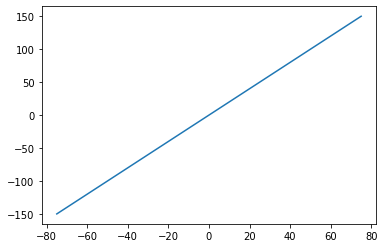

In [30]:
#ramp step function
def ramp(t, args, plotON=False):
    '''
        Basic ramp function

        INPUTS
            t (array): time domain of function
            args (dict): width of step function (i.e., start time, step width)
            plotON (bool): shows (True) or not (False) plot

        OUTPUTS
            function: function ready for aqipt.waveform()
            fig: plot of function

        \Example:

            times = np.linspace(-75, 75, 500); #time domain function

            m = 2.0;
            b = 0.1; #start time
            args = {'b': b, 'm':m}; #arguments for function

            f, fplot = ramp(times, args, True);
            plt.show(fplot)

    '''
    
    function = args['m'] * t + args['b'];
    

    
    if plotON==True:
        
        fig = plt.figure();
        fplot = plt.plot(t, function, figure=fig);
        plt.show(fplot)
        
        return function, fplot
    
    else:
        
        return function, plt.plot(t, function)

#example
times = np.linspace(-75, 75, 500); #time domain function

m = 2.0;
b = 0.1; #start time
args = {'b': b, 'm':m}; #arguments for function

f, fplot = ramp(times, args, True);
plt.show(fplot)

# Rectangular step 

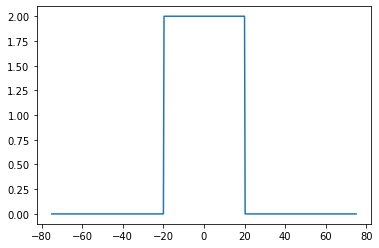

In [31]:
#rectangular step function
def step(t, args, plotON=False):
    '''
        Basic step function

        INPUTS
            t (array): time domain of function
            args (dict): width of step function (i.e., start time, step width)
            plotON (bool): shows (True) or not (False) plot

        OUTPUTS
            function: function ready for aqipt.waveform()
            fig: plot of function

        \Example:

                times = np.linspace(0, 1, 100)

                to = 0.2;
                fwidth = 0.1;
                args = {'t_o':to, 'width': fwidth};

                plt.plot(times, step(times, args))

    '''
    
    function = args['amp'] * (abs(t-args['t_o']) < args['width']);
    

    
    if plotON==True:
        
        fig = plt.figure();
        fplot = plt.plot(t, function, figure=fig);
        plt.show(fplot)
        
        return function, fplot
    
    else:
        
        return function, plt.plot(t, function)

#example
times = np.linspace(-75, 75, 500); #time domain function

amp = 2.0;
to = 0.2; #start time
fwidth = 20.0; #width of step function
args = {'amp': amp, 't_o':to, 'width': fwidth}; #arguments for function

f, fplot = step(times, args, True);
plt.show(fplot)

# Gaussian function

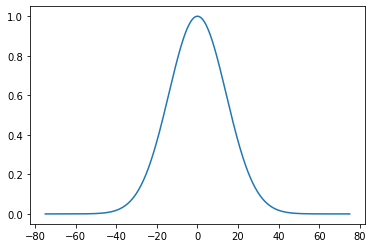

In [85]:
#gaussian function
def gauss(t, args, plotON=False):
    '''
        Basic Gaussian function

        INPUTS
            t (array): time domain of function
            args (dict): width of step function (i.e., amplitude, center, standar deviation)
            plotON (bool): shows (True) or not (False) plot

        OUTPUTS
            function: function ready for aqipt.waveform()
            fig: plot of function

        \Example:

                times = np.linspace(0, 1, 100)

                amp = 1.0; #gaussian amplitude
                center = 0.0; #gaussian center
                std = 0.1; #standard deviation
                args = {'g_Amp':amp, 'g_center': center, 'g_std':std}; #arguments for function

                plt.plot(times, gauss(times, args))

    '''
    
    function = args['g_Amp'] * np.exp( -( (t - args['g_center']) / 2*args['g_std'])**2 );
    

    
    if plotON==True:
        
        fig = plt.figure();
        fplot = plt.plot(t, function, figure=fig);
        plt.show(fplot)
        
        return function, fplot
    
    else:
        
        return function, plt.plot(t, function)
    



#example
times = np.linspace(-75, 75, 500); #time domain function

amp = 1.0; #gaussian amplitude
center = 0.0; #gaussian center
std = 0.1; #standard deviation
args = {'g_Amp':amp, 'g_center': center, 'g_std':std}; #arguments for function

f, fplot =gauss(times, args);
plt.show(fplot)


# Triangular function

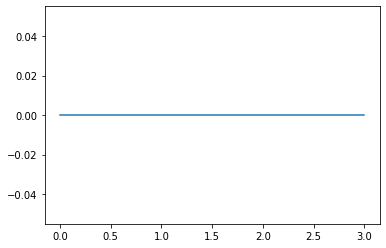

In [33]:
#triangular function
def triangular(t, args, plotON=False):
    '''
    Basic triangular function

    INPUTS
        t (array): time domain of function
        args (dict): width of step function (i.e., amplitude, center, standar deviation)
        plotON (bool): shows (True) or not (False) plot

    OUTPUTS
        function: function ready for aqipt.waveform()
        fig: plot of function

    \Example:

            times = np.linspace(0, 3, 500); #time domain function

            tri_amp = 0; #gaussian amplitude
            tri_freq = 2; #gaussian center
            tri_phase = 0; #standard deviation
            args = {'tri_amp':tri_amp, 'tri_freq':tri_freq, 'tri_phase':tri_phase}; #arguments for function


            f, fplot = triangular(times, args)

    '''

    function = args['tri_amp'] *signal.sawtooth(2 * np.pi * args['tri_freq'] * t + args['tri_phase'], 0.5);



    if plotON==True:

        fig = plt.figure();
        fplot = plt.plot(t, function, figure=fig);
        plt.show(fplot)

        return function, fplot

    else:

        return function, plt.plot(t, function)

    
#example
times = np.linspace(0, 3, 500); #time domain function

tri_amp = 0; #gaussian amplitude
tri_freq = 2; #gaussian center
tri_phase = 0; #standard deviation
args = {'tri_amp':tri_amp, 'tri_freq':tri_freq, 'tri_phase':tri_phase}; #arguments for function


f, fplot = triangular(times, args)

# Sawtooth function

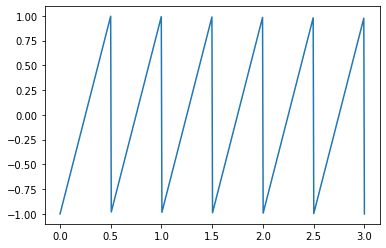

In [34]:
#sawtooth function
def sawtooth(t, args, plotON=False):
    '''
    Basic sawtooth function

    INPUTS
        t (array): time domain of function
        args (dict): width of step function (i.e., amplitude, center, standar deviation)
        plotON (bool): shows (True) or not (False) plot

    OUTPUTS
        function: function ready for aqipt.waveform()
        fig: plot of function

    \Example:

            times = np.linspace(0, 3, 500); #time domain function

            tri_amp = 0; #gaussian amplitude
            tri_freq = 2; #gaussian center
            tri_phase = 0; #standard deviation
            args = {'tri_amp':tri_amp, 'tri_freq':tri_freq, 'tri_phase':tri_phase}; #arguments for function


            f, fplot = sawtooth(times, args)

    '''

    function = args['tri_amp'] *signal.sawtooth(2 * np.pi * args['tri_freq'] * t + args['tri_phase'], 1);



    if plotON==True:

        fig = plt.figure();
        fplot = plt.plot(t, function, figure=fig);
        plt.show(fplot)

        return function, fplot

    else:

        return function, plt.plot(t, function)

    
#example
times = np.linspace(0, 3, 500); #time domain function

swt_amp = 1; #amplitude
swt_freq = 2; #frequency
swt_phase = 0; #phase
args = {'tri_amp':swt_amp, 'tri_freq':swt_freq, 'tri_phase':swt_phase}; #arguments for function


f, fplot = sawtooth(times, args)

# Sinusoidal function

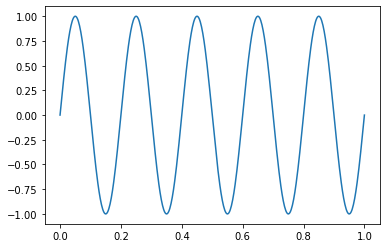

In [35]:
#sinusoidal function
def sinusoidal(t, args, plotON=False):
    '''
        Basic sinusoidal function

        INPUTS
            t (array): time domain of function
            args (dict): width of step function (i.e., amplitude, frequency, phase)
            plotON (bool): shows (True) or not (False) plot

        OUTPUTS
            function: function ready for aqipt.waveform()
            fig: plot of function

        \Example:

            times = np.linspace(0, 1, 500); #time domain function

            args = {'Amp':1, 'freq':5, 'phase':0}; #arguments for function

            f, fplot = sinusoidal(times, args);
            plt.show(fplot)

    '''
    
    function = args['Amp']*np.sin(2 * np.pi * args['freq'] * t + args['phase']);
    

    
    if plotON==True:
        
        fig = plt.figure();
        fplot = plt.plot(t, function, figure=fig);
        plt.show(fplot)
        
        return function, fplot
    
    else:
        
        return function, plt.plot(t, function)
    



#example
times = np.linspace(0, 1, 500); #time domain function

args = {'Amp':1, 'freq':5, 'phase':0}; #arguments for function

f, fplot = sinusoidal(times, args);
plt.show(fplot)


# Parabolic function

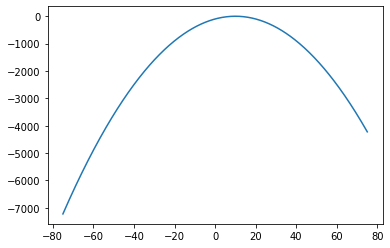

In [36]:
#parabolic function
def parabola(t, args, plotON=False):
    '''
        Basic Parabola function

        INPUTS
            t (array): time domain of function
            args (dict): width of step function (i.e., polynomia coefficients, shift)
            plotON (bool): shows (True) or not (False) plot

        OUTPUTS
            function: function ready for aqipt.waveform()
            fig: plot of function

        \Example:

            times = np.linspace(-75, 75, 500); #time domain function

            args = {'a':1, 'b': 0, 'c':0, 'shift':0}; #arguments for function

            f, fplot = parabola(times, args);
            plt.show(fplot)

    '''
    
    function = args['a']*(t-args['shift'])**2 + args['b']*t + args['c'];
    

    
    if plotON==True:
        
        fig = plt.figure();
        fplot = plt.plot(t, function, figure=fig);
        plt.show(fplot)
        
        return function, fplot
    
    else:
        
        return function, plt.plot(t, function)
    



#example
times = np.linspace(-75, 75, 500); #time domain function

args = {'a':-1, 'b':0, 'c':0, 'shift':10}; #arguments for function

f, fplot = parabola(times, args);

plt.show(fplot)


# Class ```function()```

In [69]:
class function:
    """
        A class for representing easy function objects, such as square pulses, 
        sine, gaussian pulses etc.

        The function class is the AQiPT representation of functions for create waveforms.
        This class also show plots in matplotlib, as well as export the functions to numpy arrays.


        Parameters
        ----------
        tbase : array_like
            Data for vector/matrix representation of the quantum object.
        res : list
            Dimensions of object used for tensor products.
        args : list
            Shape of underlying data structure (matrix shape).

        Attributes
        ----------
        function : array_like
            Sparse matrix characterizing the quantum object.
        function_plot : list
            List of dimensions keeping track of the tensor structure.

        Methods
        -------
        step()
            Conjugate of quantum object.
    """
    def __init__(self, times, args):
        
        #atributes
        self.tbase = times
        self._res = type
        self.args = args
        
    def step(self, plotON=False):
        '''
            Basic step function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., start time, step width)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                times = np.linspace(0, 1, 100)

                to = 0.2;
                fwidth = 0.1;
                args = {'t_o':to, 'width': fwidth};

                plt.plot(times, step(times, args))
            '''

        function = self.args['amp'] * (abs(self.tbase-self.args['t_o']) < self.args['width']);



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)
    
    def ramp(self, plotON=False):
        '''
            Basic ramp function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., start time, step width)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                    times = np.linspace(0, 1, 100)

                    to = 0.2;
                    fwidth = 0.1;
                    args = {'t_o':to, 'width': fwidth};

                    plt.plot(times, step(times, args))

        '''

        function = self.args['m'] * self.tbase + self.args['b'];



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot
    
        else:

            return function, plt.plot(self.tbase, function)

    def parabola(self, plotON=False):
        '''
            Basic Parabola function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., polynomia coefficients, shift)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                times = np.linspace(-75, 75, 500); #time domain function

                args = {'a':1, 'b': 0, 'c':0, 'shift':0}; #arguments for function

                f, fplot = parabola(times, args);
                plt.show(fplot)

        '''

        function = self.args['a']*(self.tbase-self.args['shift'])**2 + self.args['b']*self.tbase + self.args['c'];



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)
        
    def sinusoidal(self, plotON=False):
        '''
            Basic sinusoidal function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., amplitude, frequency, phase)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                times = np.linspace(0, 1, 500); #time domain function

                args = {'Amp':1, 'freq':5, 'phase':0}; #arguments for function

                f, fplot = sinusoidal(times, args);
                plt.show(fplot)

        '''

        function = self.args['Amp']*np.sin(2 * np.pi * self.args['freq'] * self.tbase + self.args['phase']);



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)
        
    def gaussian(self, plotON=False):
        '''
            Basic Gaussian function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., amplitude, center, standar deviation)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                    times = np.linspace(0, 1, 100)

                    amp = 1.0; #gaussian amplitude
                    center = 0.0; #gaussian center
                    std = 0.1; #standard deviation
                    args = {'g_Amp':amp, 'g_center': center, 'g_std':std}; #arguments for function

                    plt.plot(times, gauss(times, args))

        '''

        function = self.args['g_Amp'] * np.exp( -( (self.tbase - self.args['g_center'])**2 / (4*(self.args['g_std'])**2) ));



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)
        
    def triangular(self, plotON=False):
        '''
        Basic triangular function

        INPUTS
            t (array): time domain of function
            args (dict): width of step function (i.e., amplitude, center, standar deviation)
            plotON (bool): shows (True) or not (False) plot

        OUTPUTS
            function: function ready for aqipt.waveform()
            fig: plot of function

        \Example:

            times = np.linspace(0, 3, 500); #time domain function

            tri_amp = 0; #gaussian amplitude
            tri_freq = 2; #gaussian center
            tri_phase = 0; #standard deviation
            args = {'tri_amp':tri_amp, 'tri_freq':tri_freq, 'tri_phase':tri_phase}; #arguments for function


            f, fplot = triangular(times, args)

        '''

        function = self.args['tri_amp'] *signal.sawtooth(2 * np.pi * self.args['tri_freq'] * self.tbase + self.args['tri_phase'], 0.5);



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)
    
    def sawtooth(self, plotON=False):
        '''
        Basic sawtooth function

        INPUTS
            t (array): time domain of function
            args (dict): width of step function (i.e., amplitude, center, standar deviation)
            plotON (bool): shows (True) or not (False) plot

        OUTPUTS
            function: function ready for aqipt.waveform()
            fig: plot of function

        \Example:

            times = np.linspace(0, 3, 500); #time domain function

            tri_amp = 0; #gaussian amplitude
            tri_freq = 2; #gaussian center
            tri_phase = 0; #standard deviation
            args = {'tri_amp':tri_amp, 'tri_freq':tri_freq, 'tri_phase':tri_phase}; #arguments for function


            f, fplot = sawtooth(times, args)

        '''

        function = self.args['tri_amp'] *signal.sawtooth(2 * np.pi * self.args['tri_freq'] * self.tbase + self.args['tri_phase'], 1);



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)


In [38]:
def digitize(data, bitdepth, bottom, top):  #Finn & Shannon's code
    d = np.clip(data, bottom, top)
    a=top-bottom
    return (np.round(((d/a)-bottom)*(2**bitdepth-1))/(2**bitdepth-1)+bottom)*a

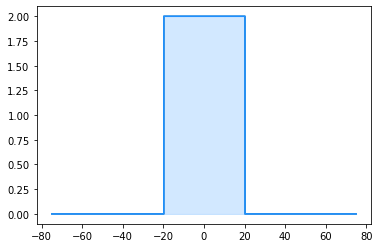

In [74]:
#square pulse with the class aqipt.function(times, args).step()

times = np.linspace(-75, 75, 2**16); #time domain function

amp = 2.0;
to = 0.2; #start time
fwidth = 20.0; #width of step function
args = {'amp': amp, 't_o':to, 'width': fwidth}; #arguments for function

funcP, plot = function(times, args).step();
# funcP = function(times, args).step();

plt.step(times, funcP, color='dodgerblue', where='mid')
plt.fill_between(times, funcP, color='dodgerblue', step="mid", alpha=0.2)


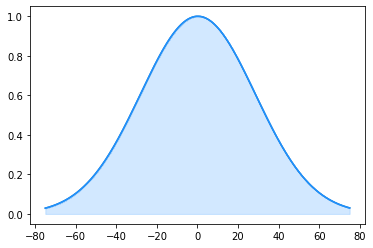

In [101]:
#square pulse with the class aqipt.function(times, args).step()

times = np.linspace(-75, 75, 2**16); #time domain function

g_amp = 1.0;
g_center = 0.2; #start time
g_std = 20.0; #width of step function
args = {'g_Amp': g_amp, 'g_center':g_center, 'g_std': g_std}; #arguments for function

funcG, plot = function(times, args).gaussian();

plt.step(times, funcG, color='dodgerblue', where='mid')
plt.fill_between(times, funcG, color='dodgerblue', step="mid", alpha=0.2)


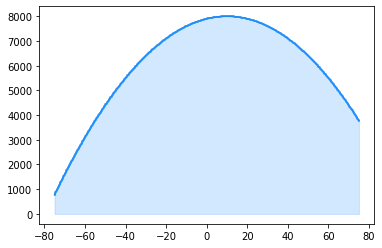

In [75]:
#parabola pulse with the class aqipt.function(times, args).parabola()

times = np.linspace(-75, 75, 500); #time domain function

args = {'a':-1, 'b':0, 'c':8000, 'shift':10}; #arguments for function

func, plot = function(times, args).parabola()

plt.step(times, func, color='dodgerblue', where='mid')
plt.fill_between(times, func, color='dodgerblue', step="mid", alpha=0.2)

(0.0, 1.0)

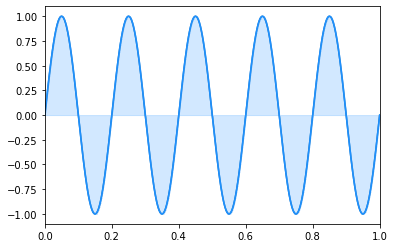

In [102]:
#parabola pulse with the class aqipt.function(times, args).parabola()

times = np.linspace(0, 1,2**16) ; #time domain function

args = {'Amp':1, 'freq':5, 'phase':0}; #arguments for function

funcSine, plot = function(times, args).sinusoidal()

plt.step(times, funcSine, color='dodgerblue', where='mid')
plt.fill_between(times, funcSine, color='dodgerblue', step="mid", alpha=0.2)
plt.xlim(0, 1)

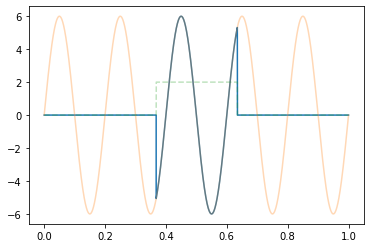

In [79]:
#waveform
plt.plot(times, funcSine*funcP)
plt.plot(times, 2*funcSine, alpha=0.3)
plt.plot(times, funcP, '--', alpha=0.3)

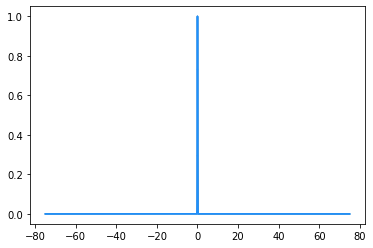

In [80]:
#gaussian pulse with the class aqipt.function(times, args).step()

times = np.linspace(-75, 75, 2**16); #time domain function

amp = 1.0; #gaussian amplitude
center = 0.0; #gaussian center
std = 0.05; #standard deviation
args = {'g_Amp':amp, 'g_center': center, 'g_std':std}; #arguments for functionction

func, plot = function(times, args).gaussian();

plt.step(times, func, color='dodgerblue', where='mid')
plt.fill_between(times, func, color='dodgerblue', step="mid", alpha=0.2)


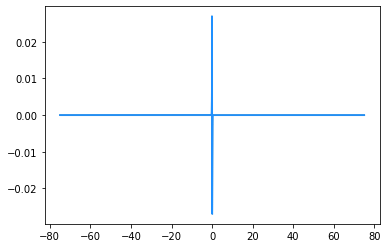

In [81]:
plt.plot(times, funcSine*func)
plt.step(times, funcSine*func, color='dodgerblue', where='mid')
plt.fill_between(times, funcSine*func, color='dodgerblue', step="mid", alpha=0.2)


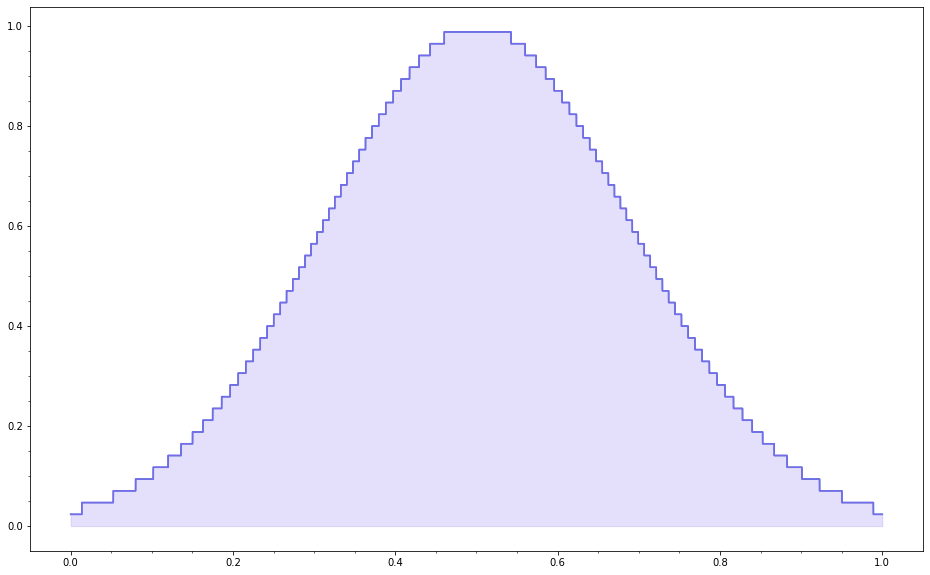

In [121]:
plt.figure(figsize=(16,10))
dig_func = digitize(funcG, 8, -3, 3)
plt.plot(times, dig_func)
plt.step(times, dig_func, color='mediumslateblue', where='mid')
plt.fill_between(times, dig_func, color='mediumslateblue', step="mid", alpha=0.2)
# plt.grid(b=True, which='both', color='gray', linestyle='--', alpha=0.2)
plt.minorticks_on()

plt.savefig('logo_AQiPT.svg', format='svg')


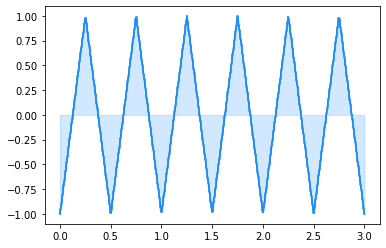

In [83]:
#triangular pulse with the class aqipt.function(times, args).triangular()

times = np.linspace(0, 3, 500); #time domain function

tri_amp = 1; #gaussian amplitude
tri_freq = 2; #gaussian center
tri_phase = 0; #standard deviation
args = {'tri_amp':tri_amp, 'tri_freq':tri_freq, 'tri_phase':tri_phase}; #arguments for function

func, plot = function(times, args).triangular();

plt.step(times, func, color='dodgerblue', where='mid')
plt.fill_between(times, func, color='dodgerblue', step="mid", alpha=0.2)


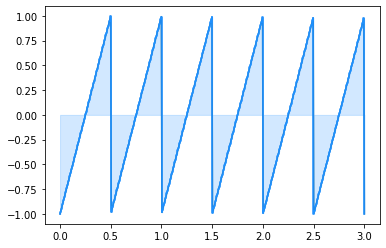

In [65]:
#sawtooth pulse with the class aqipt.function(times, args).sawtooth()

times = np.linspace(0, 3, 500); #time domain function

swt_amp = 1; #gaussian amplitude
swt_freq = 2; #gaussian center
swt_phase = 0; #standard deviation
args = {'tri_amp':swt_amp, 'tri_freq':swt_freq, 'tri_phase':swt_phase}; #arguments for function

func, plot = function(times, args).sawtooth();

plt.step(times, func, color='dodgerblue', where='mid')
plt.fill_between(times, func, color='dodgerblue', step="mid", alpha=0.2)


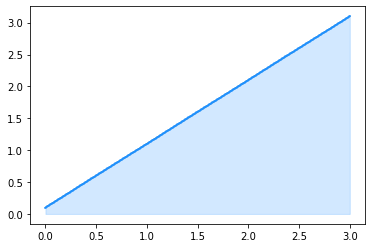

In [66]:
#ramp pulse with the class aqipt.function(times, args).step()

times = np.linspace(0, 3, 500); #time domain function

m = 1.0;
b = 0.1; #start time
args = {'b': b, 'm':m}; #arguments for function

func, plot = function(times, args).ramp();

plt.step(times, func, color='dodgerblue', where='mid')
plt.fill_between(times, func, color='dodgerblue', step="mid", alpha=0.2)


# Examples

(-20.0, 20.0)

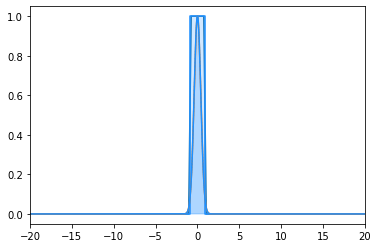

In [71]:
#square pulse with the class aqipt.function(times, args).step()

times = np.linspace(-75, 75, 500); #time domain function

amp = 1.0;
to = 0.0; #start time
fwidth = 1.0; #width of step function
args = {'amp': amp, 't_o':to, 'width': fwidth}; #arguments for function

SquareP, plot = function(times, args).step();

plt.step(times, SquareP, color='dodgerblue', where='mid')
plt.fill_between(times, SquareP, color='dodgerblue', step="mid", alpha=0.2)


#gaussian pulse with the class aqipt.function(times, args).step()

times = np.linspace(-75, 75, 2**16); #time domain function

amp = 1.0; #gaussian amplitude
center = 0.0; #gaussian center
std = 1/(2*np.sqrt(np.pi)); #standard deviation
args = {'g_Amp':amp, 'g_center': center, 'g_std':std}; #arguments for functionction

GaussP, plot = function(times, args).gaussian();

plt.step(times, GaussP, color='dodgerblue', where='mid')
plt.fill_between(times, GaussP, color='dodgerblue', step="mid", alpha=0.2)

plt.xlim(-20,20)

In [2]:
#libs summary
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'json',
 'numpy',
 'matplotlib.pyplot',
 'scipy.stats',
 'scipy.signal',
 'types']